In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
print('Seaborn verion:', sns.__version__)
print('Pandas verion: ',pd.__version__)
print('Numpy verion:  ',np.__version__)

Seaborn verion: 0.9.0
Pandas verion:  0.25.3
Numpy verion:   1.18.1


In [8]:
wine_data = pd.read_csv('datasets/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')

In [9]:
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
Fixed Acidity           4898 non-null float64
Volatile Acidity        4898 non-null float64
Citric Acid             4898 non-null float64
Residual Sugar          4898 non-null float64
Chlorides               4898 non-null float64
Free Sulfur Dioxide     4898 non-null float64
Total Sulfur Dioxide    4898 non-null float64
Density                 4898 non-null float64
pH                      4898 non-null float64
Sulphates               4898 non-null float64
Alcohol                 4898 non-null float64
Quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### For distributions which vary randomnly with respect to one variable - Univariate Distribution

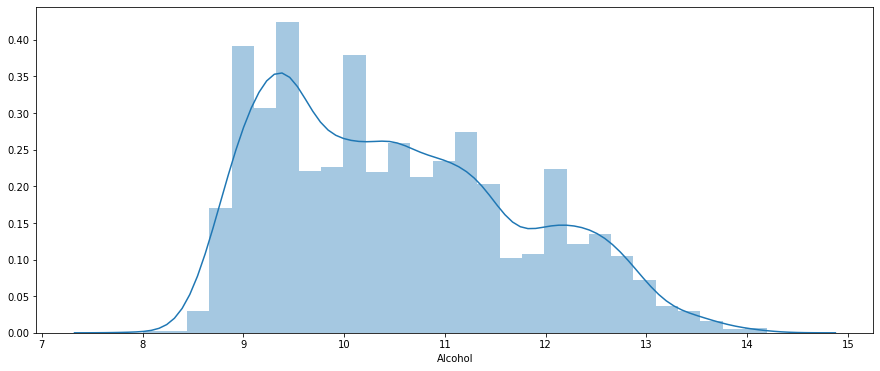

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(wine_data['Alcohol'])
plt.show()

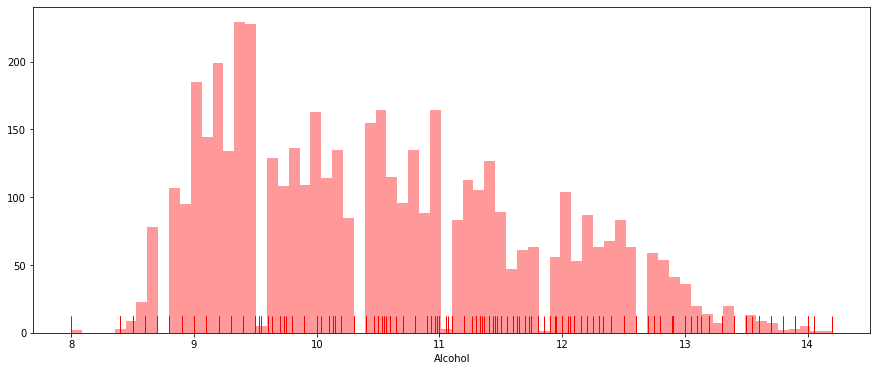

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(wine_data['Alcohol'], kde=False, rug=True, bins=70, color='r');

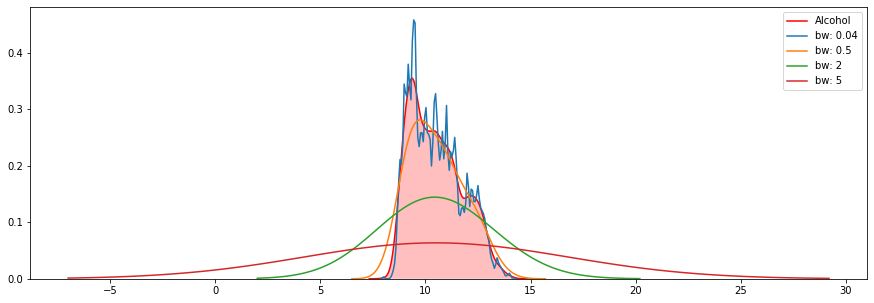

In [67]:
f,ax=plt.subplots(figsize=(15,5))

sns.kdeplot(wine_data['Alcohol'], label='Alcohol', shade=True, color='r')
sns.kdeplot(wine_data['Alcohol'], bw=.04, label="bw: 0.04")
sns.kdeplot(wine_data['Alcohol'], bw=.5, label="bw: 0.5")
sns.kdeplot(wine_data['Alcohol'], bw=2, label="bw: 2")
sns.kdeplot(wine_data['Alcohol'], bw=5, label="bw: 5")

plt.show()

## For distributions which vary randomly in two variables : BIVARIATE DISTRIBUTIONS

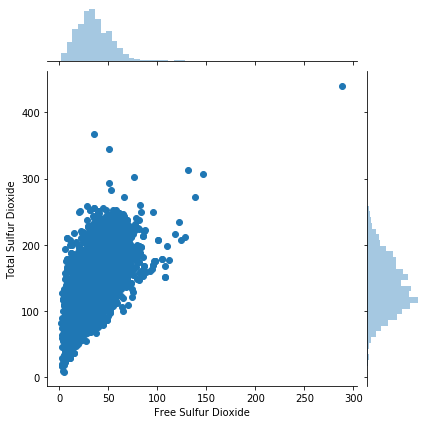

In [42]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data)
plt.show()

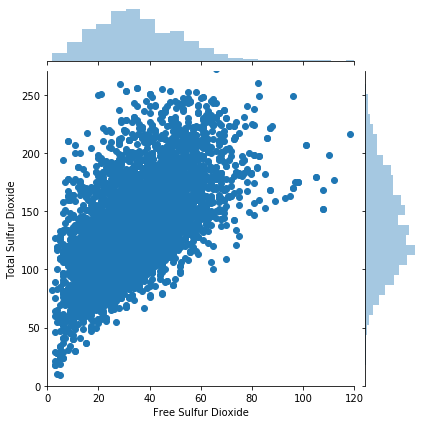

In [46]:
#Adding a x and y limit to the plot to see the scatter plot better
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data,
              xlim={0,120}, ylim={0,270})

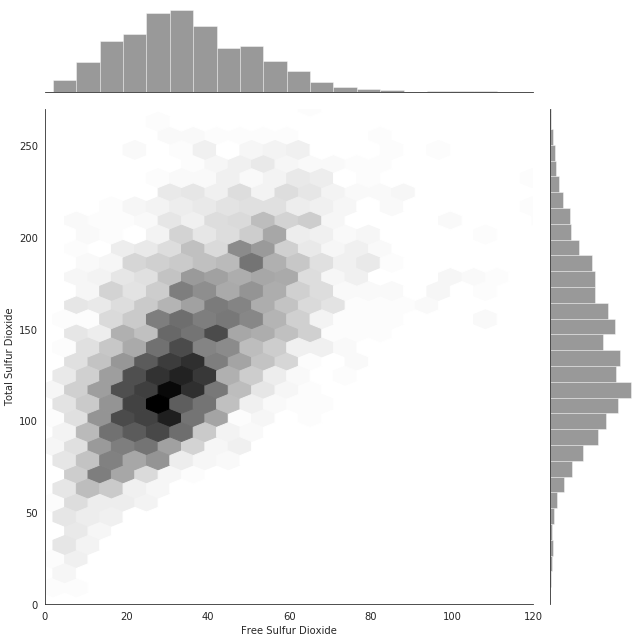

In [56]:
#Adding a hex type to the plot

with sns.axes_style('white'):
    sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
                  kind='hex',color='k',height=9,
                  xlim={0,120}, ylim={0,270})

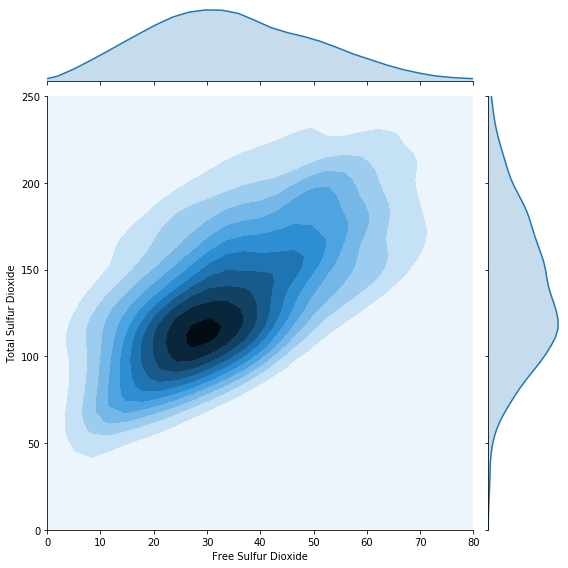

In [60]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              kind="kde", height=8,
              xlim={0,80}, ylim={0,250})

plt.show()

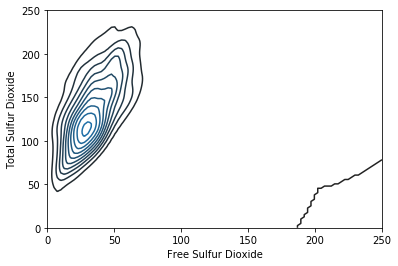

In [62]:
# The clip parameters clips the plot to the specified limits
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))
plt.show()

(0, 250)

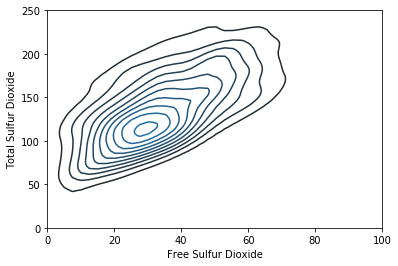

In [63]:
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))

#Setting limits to the x and y axes
plt.xlim(0,100)
plt.ylim(0,250)

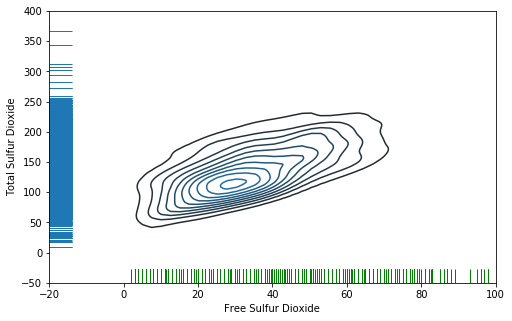

In [69]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(8,5))

sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'], clip=(0,250))


#adding rug plots to the above
#The vertical tag is used to plot the rug lines along x axis for Total Sulfur Dioxide
sns.rugplot(wine_data['Free Sulfur Dioxide'], color="g", height=0.05)
sns.rugplot(wine_data['Total Sulfur Dioxide'], vertical=True, height=0.05);

#Setting limits to the x and y axes
plt.xlim(-20,100)
plt.ylim(-50,400)

plt.show()

### PLOTTING PAIRWISE RELATIONSHIPS

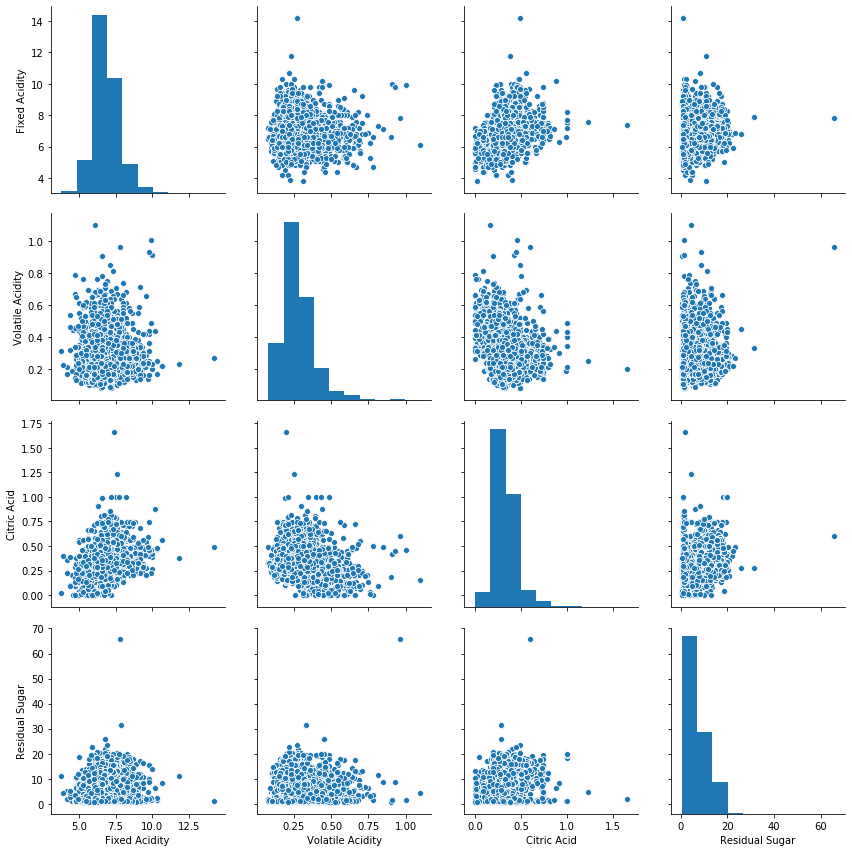

In [73]:
sns.pairplot(wine_data, height=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"])
plt.show()

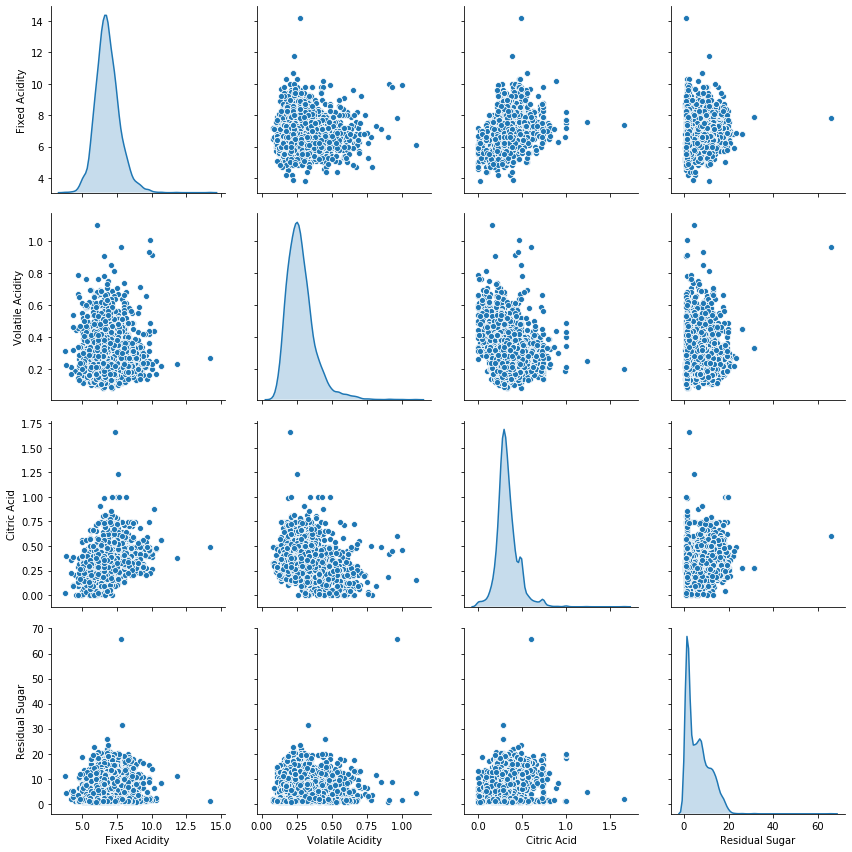

In [76]:
sns.pairplot(wine_data, height=3,
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             diag_kind="kde")
plt.show()

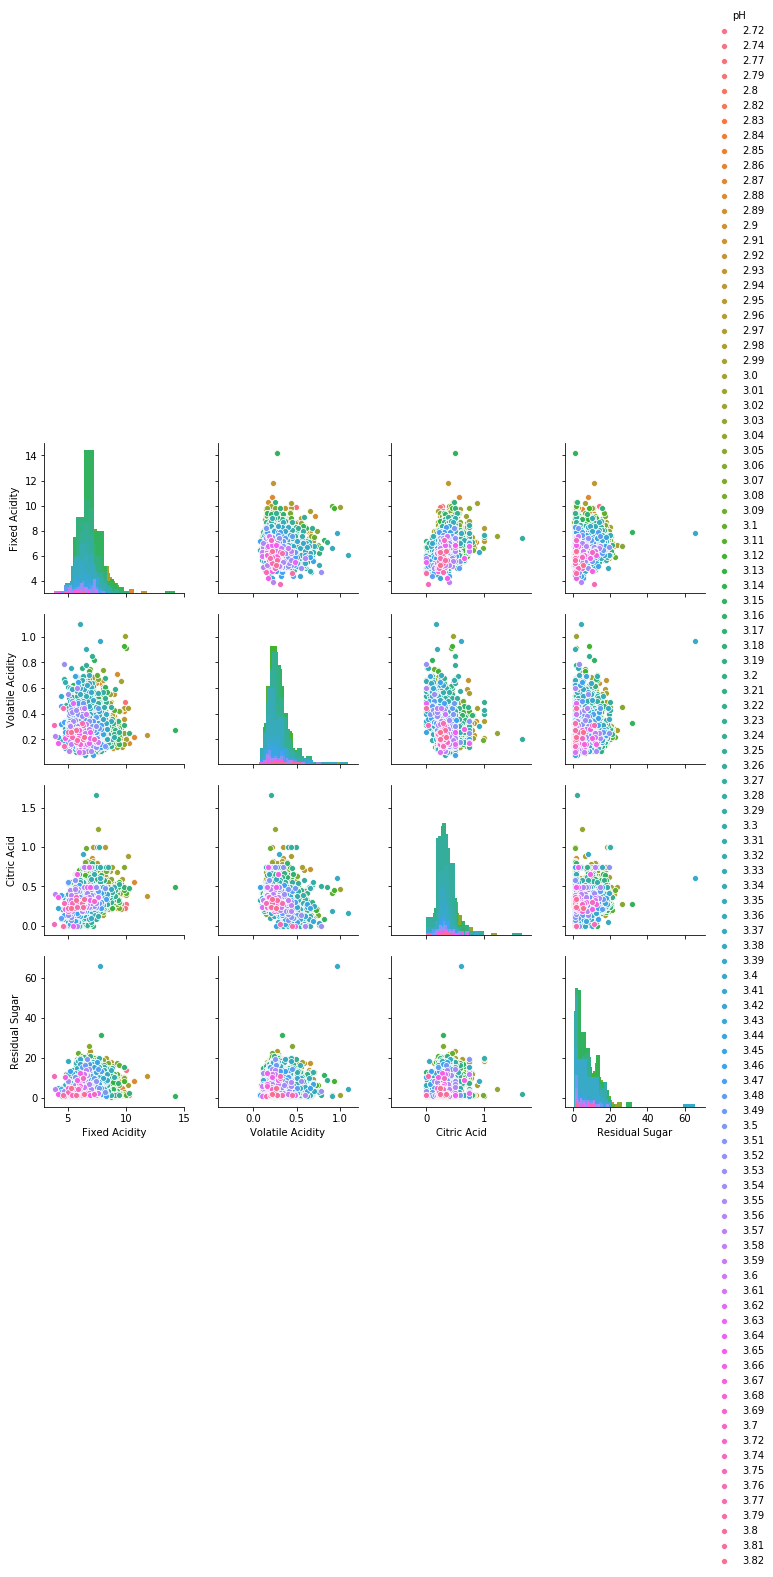

In [82]:
g = sns.pairplot(wine_data, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             hue="pH", diag_kind='hist')
plt.show()

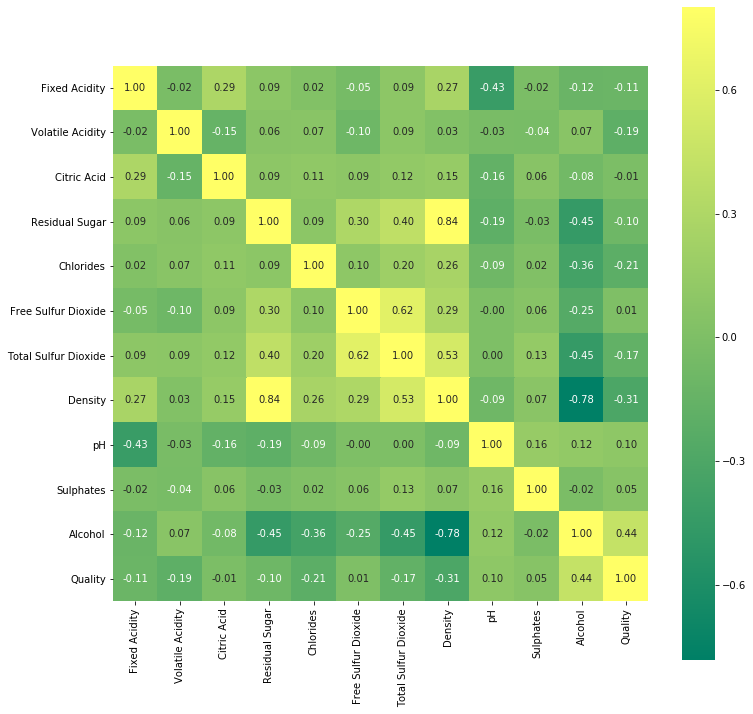

In [85]:
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

### lmplot() function
a function in seaborn used to visualize a linear relationship as determined through regression

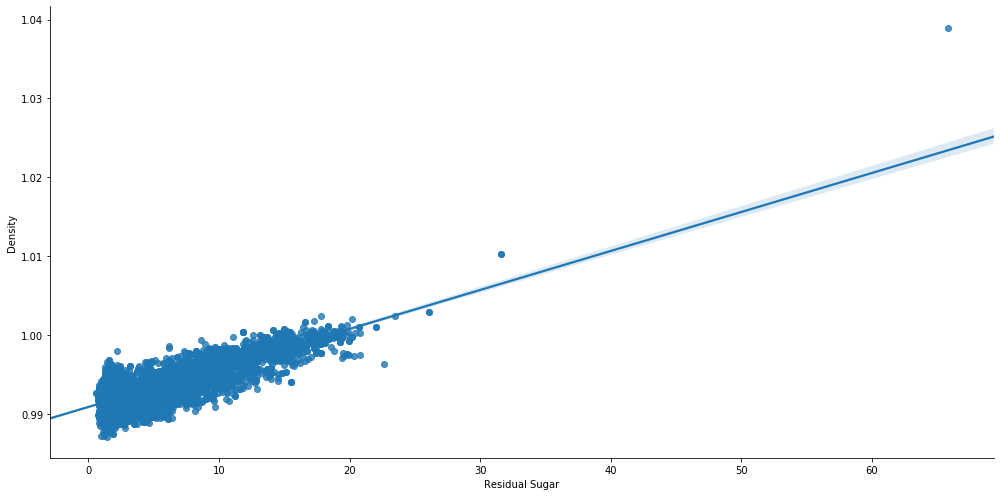

In [89]:
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, height=7, aspect=2)

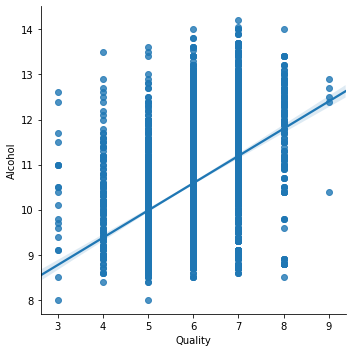

In [94]:
sns.lmplot(x='Quality', y='Alcohol', data=wine_data)

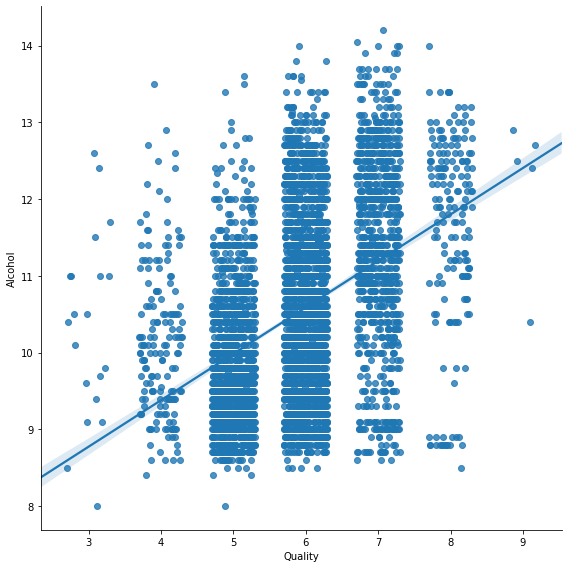

In [98]:
#Adding jitter to the scatter plots
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_jitter=.3, height=8)

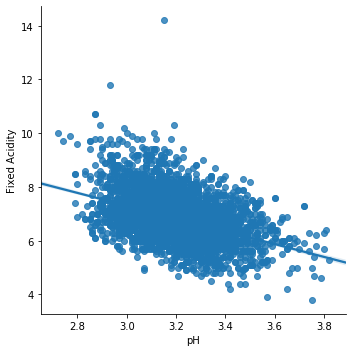

In [99]:
# We plot the relationship between Fixed Acidity content in the wine sample to its pH value
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data)

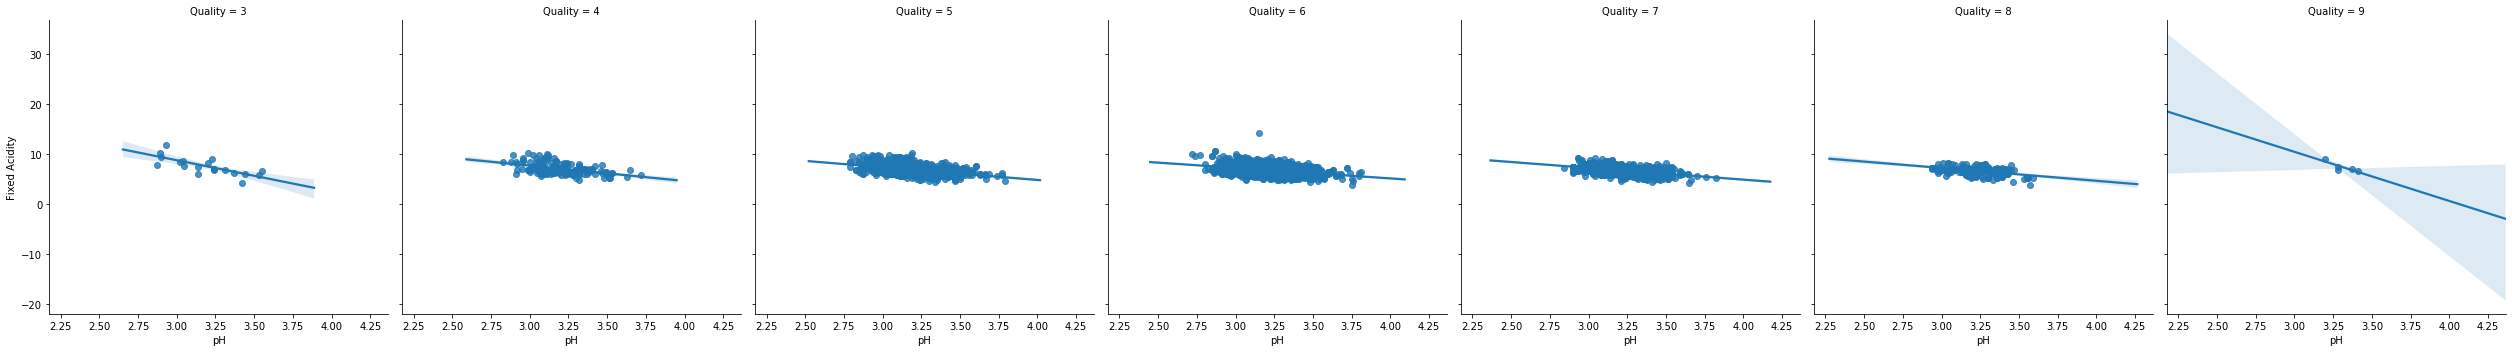

In [102]:
# We thus have as many columns as the number of different quality values.
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality")

#### Seaborn offers another function for plotting regression plots - called the regplot.
An alternative to lmplot()

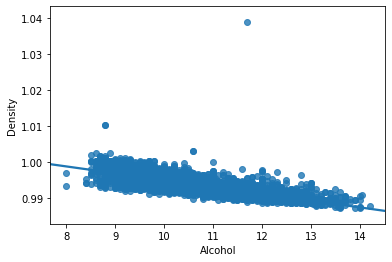

In [110]:
sns.regplot(x='Alcohol', y='Density', data=wine_data)

## Plotting categorical data

Plots, where one of the variables of interest is categorical, are best approached by methods specific to categorical plots. Seaborn provides many functions to anayse such data:
* **swarmplot()** and **stripplot()** for plots that show each observation at each level of the categorical variable
* **boxplot()** and **violinplot()** for abstract representations of each distribution of observations
* **barplot()** and **pointplot()** for those that apply statistical estimation to show a measure of central tendency and confidence interval.
* **factorplot()**, that takes the help of FacetGrid and allows the user to plot across a grid of figure panels, unlike the rest that plot onto a specific matplotlib axis

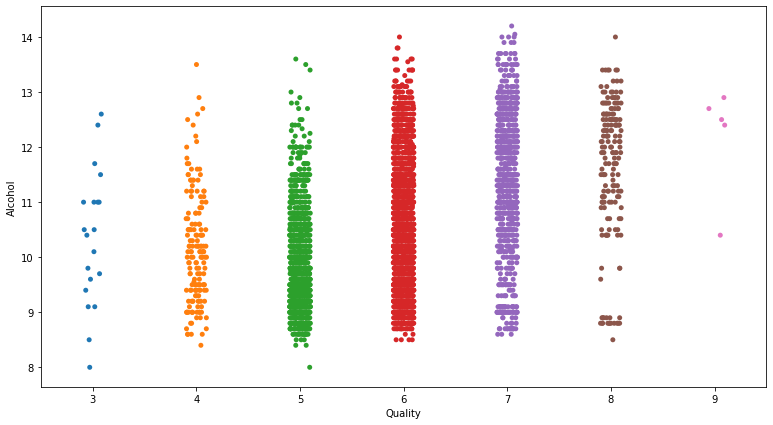

In [115]:
f,ax=plt.subplots(figsize=(13,7))

sns.stripplot(x='Quality', y='Alcohol', data=wine_data, jitter=True)

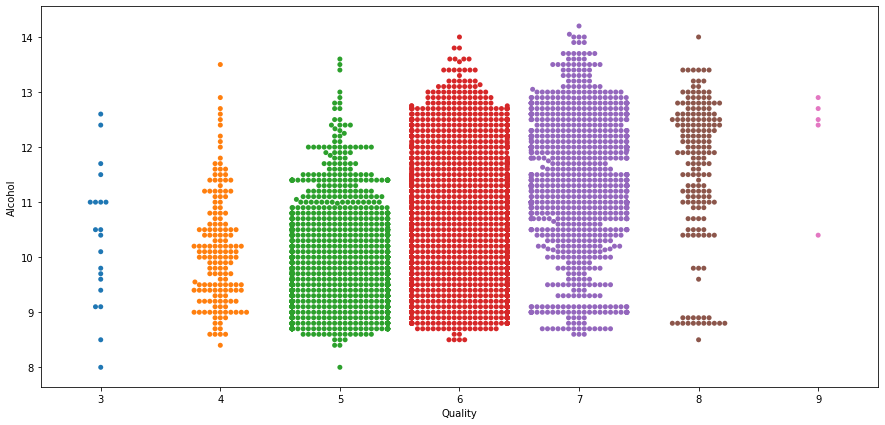

In [117]:
f,ax=plt.subplots(figsize=(15,7))

sns.swarmplot(x='Quality', y='Alcohol', data=wine_data)

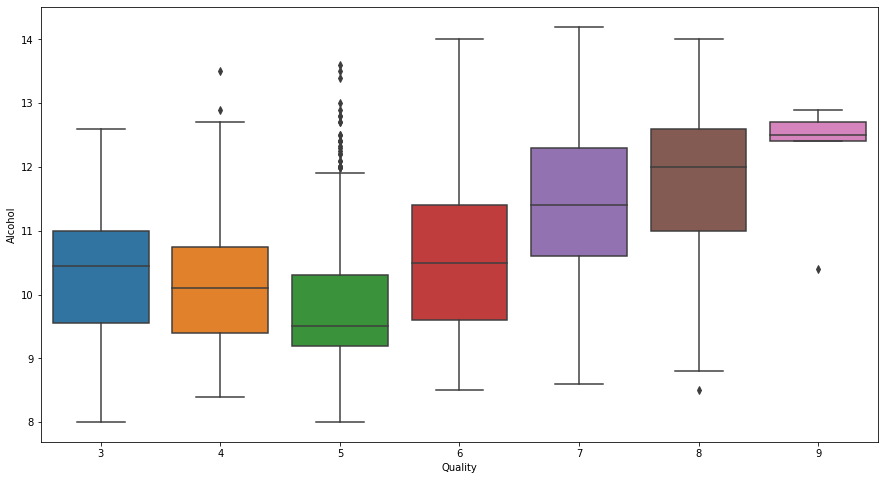

In [120]:
f,ax=plt.subplots(figsize=(15,8))

sns.boxplot(x='Quality', y='Alcohol', data=wine_data)

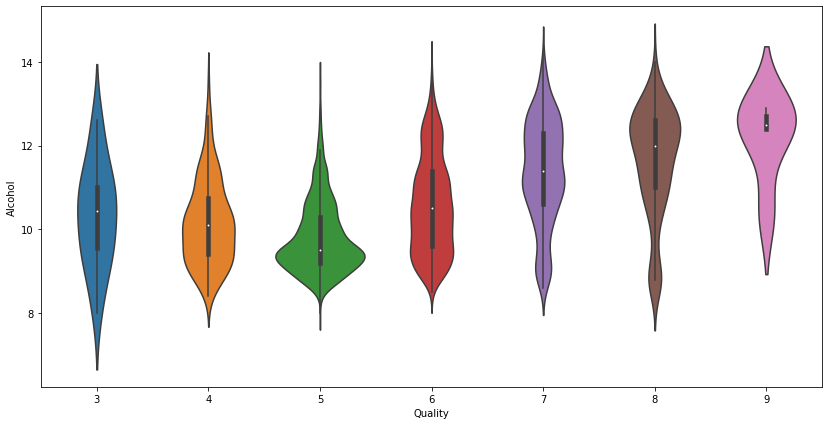

In [123]:
f,ax=plt.subplots(figsize=(14,7))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data)

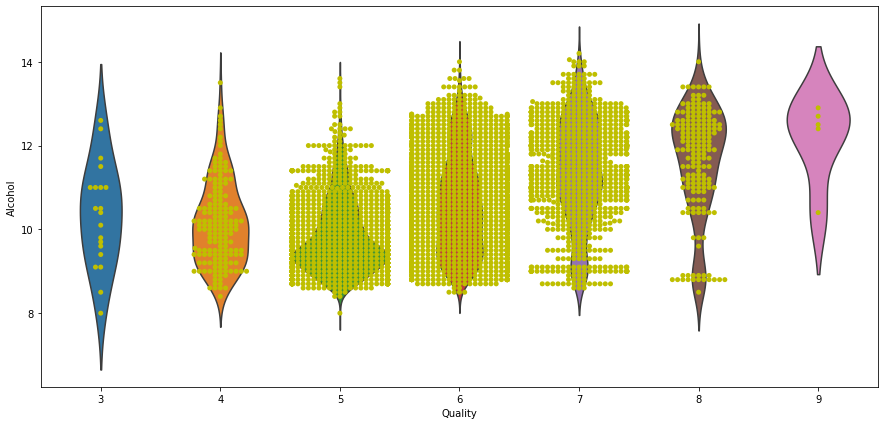

In [127]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,7))

#A combination of different plots on the same graph sometimes provides more information than individually 
#analysing different plots.

sns.swarmplot(x='Quality', y='Alcohol', data=wine_data, color='y')
sns.violinplot(x='Quality', y='Alcohol', data=wine_data, inner=None)

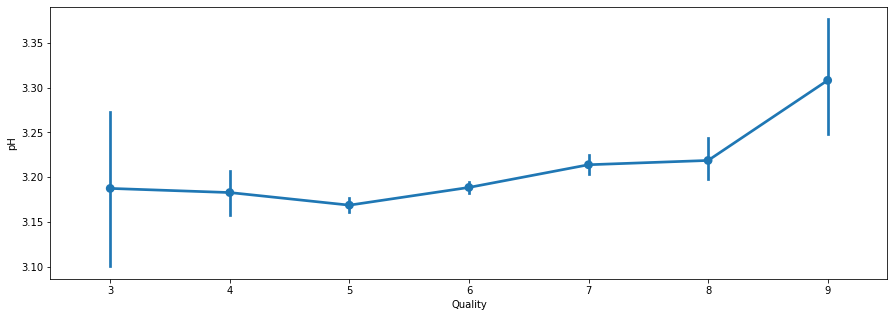

In [128]:
f,ax=plt.subplots(figsize=(15,5))

sns.pointplot(x='Quality', y='pH', data=wine_data)

## Load Facebook data
*The dataset discusses response on facebook for a set of posts that include different types/catogories.*

In [130]:
fb_data=pd.read_csv('datasets/dataset_Facebook.csv',
                     sep=r'\s*;\s*', engine='python')

In [131]:
fb_data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### FacetGrid is very useful for
* Visualising distributions and relations between variables, within subsets of the concerned dataset.
* As seen before, there are three dimensions along which we observe the data - row, column and hue.

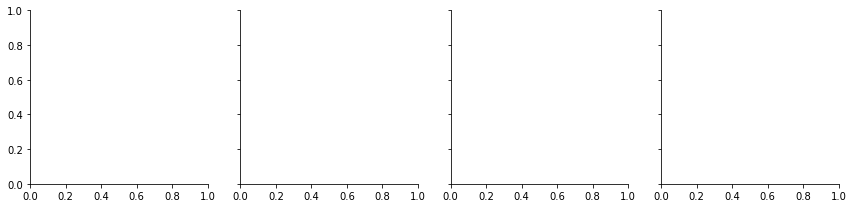

In [132]:
g=sns.FacetGrid(fb_data, col="Type")

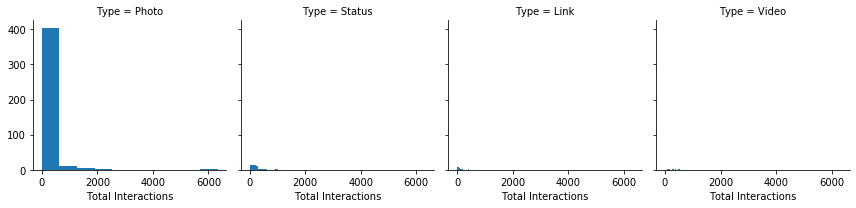

In [133]:
g=sns.FacetGrid(fb_data, col="Type")
g.map(plt.hist, "Total Interactions")

(0, 30)

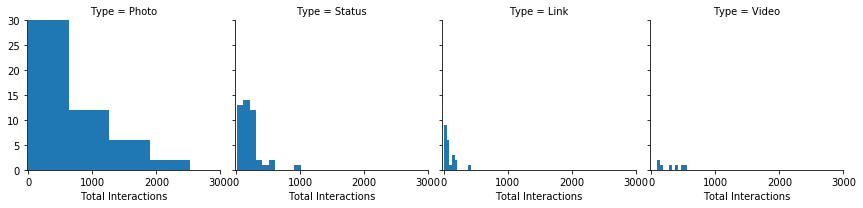

In [134]:
g=sns.FacetGrid(fb_data,col="Type")
g.map(plt.hist,"Total Interactions")

plt.xlim(-20,3000)
plt.ylim(0,30)

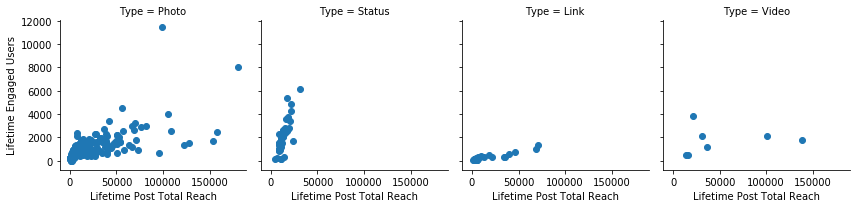

In [135]:
g=sns.FacetGrid(fb_data, col="Type")
g.map(plt.scatter,"Lifetime Post Total Reach", "Lifetime Engaged Users")

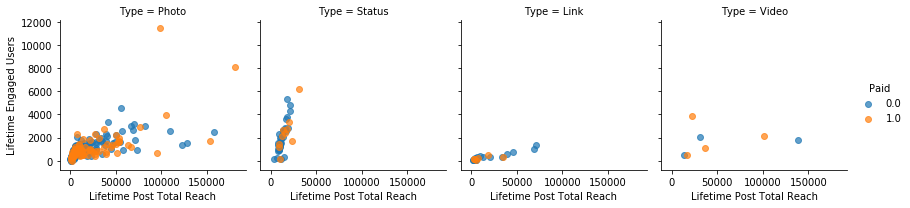

In [136]:
g=sns.FacetGrid(fb_data,col="Type",hue="Paid")

g.map(plt.scatter,"Lifetime Post Total Reach","Lifetime Engaged Users", alpha=0.7)

g.add_legend()

(0, 2500)

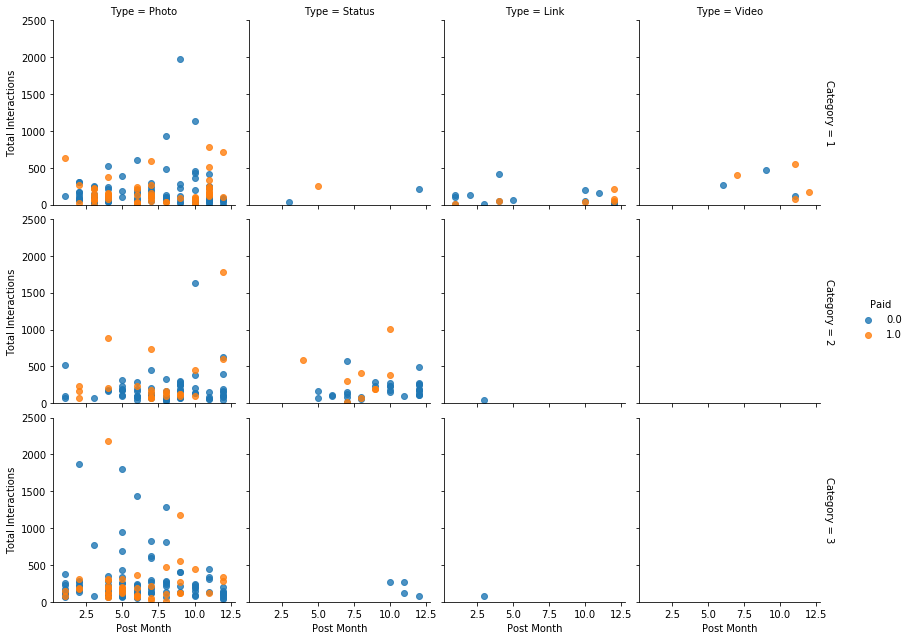

In [137]:
g=sns.FacetGrid(fb_data, row="Category", col="Type", hue="Paid", margin_titles=True)

g.map(sns.regplot,"Post Month", "Total Interactions", fit_reg=False)

g.add_legend()
plt.ylim(0,2500)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


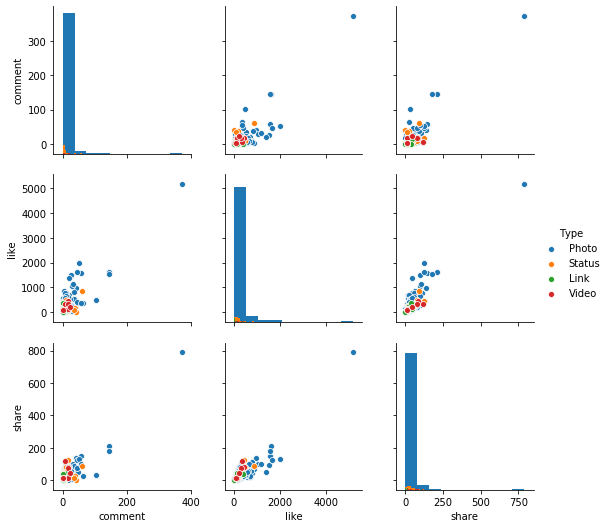

In [145]:
sns.pairplot(fb_data,
                 vars=["comment", "like", "share"],
                 hue="Type", diag_kind='hist')
plt.show()

# Seaborn themes and figure styles

Seaborn has five preset themes - 
* darkgrid
* whitegrid
* dark
* white
* ticks

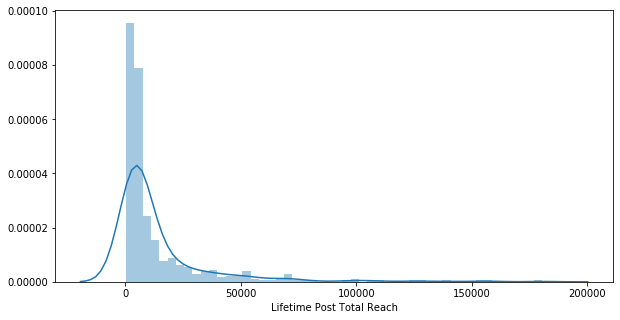

In [146]:
f,ax=plt.subplots(figsize=(10,5))

sns.distplot(fb_data['Lifetime Post Total Reach'])

In [147]:
# set the plot to its default
sns.set()

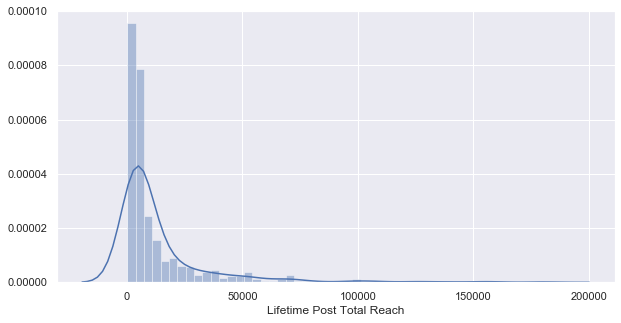

In [148]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(fb_data['Lifetime Post Total Reach'])

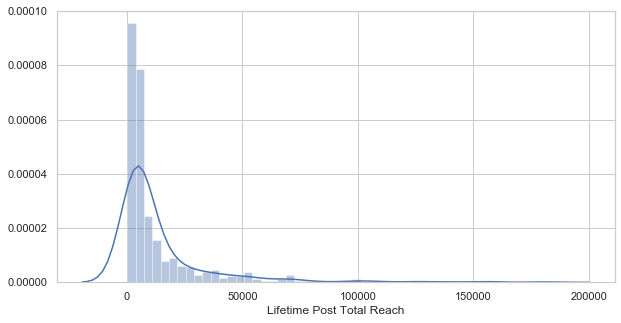

In [150]:
sns.set_style("whitegrid")

f,ax=plt.subplots(figsize=(10,5))

sns.distplot(fb_data['Lifetime Post Total Reach'])

#### If we want to use a different style for just a single plot, and then fall back to the original style

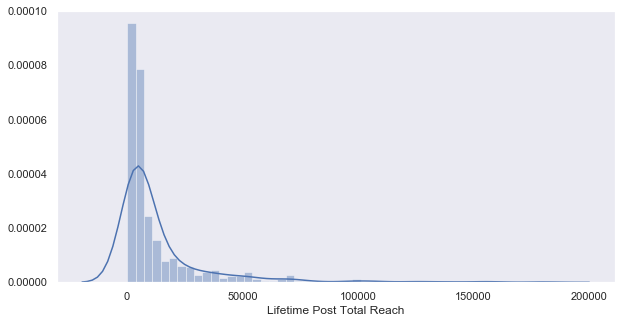

In [152]:
with sns.axes_style("dark"):
    f,ax=plt.subplots(figsize=(10,5))
    sns.distplot(fb_data['Lifetime Post Total Reach'])

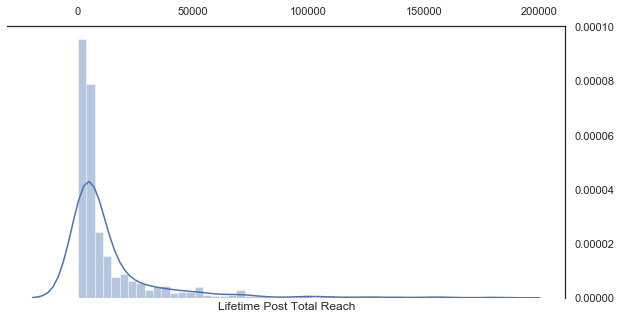

In [158]:
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(10,5))
    sns.distplot(fb_data['Lifetime Post Total Reach'])
    sns.despine(left=True, right=False, bottom=True, top=False)

# Color palettes: sequential, diverging and qualitative
The simplest way to choose colours in Seaborn is to call the **color_palette()** function.
* Most helpful when working with discrete colors
* You can pass in the name of any Seaborn palette, matplotlib colormap, list of colors specified in valid matplotlib formats (RGB tuples, hex color codes, HTML color names)
* If the function is called without any arguments, the default color cycle is returned.
* Combine this with a "with" function to temporarily set color to the plot
* You can also set the same using the **set_palette** function. This will then be used as the default matplotlib parameters for all plots that follow.

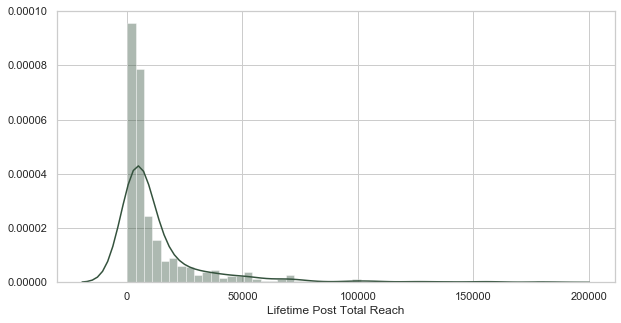

In [159]:
sns.set_palette("Greens_d")

f, ax=plt.subplots(figsize=(10,5))

sns.distplot(fb_data['Lifetime Post Total Reach'])

Depending on the kind of data you want to plot, you can choose from different categories of palettes:
* **Qualitative palettes** for categorical data
* **Sequential** or **Diverging** plots for large range of data 

## Qualitative Color Palettes

In [160]:
sns.set()

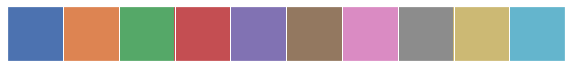

In [161]:
current_palette=sns.color_palette()
sns.palplot(current_palette)

(-50, 800)

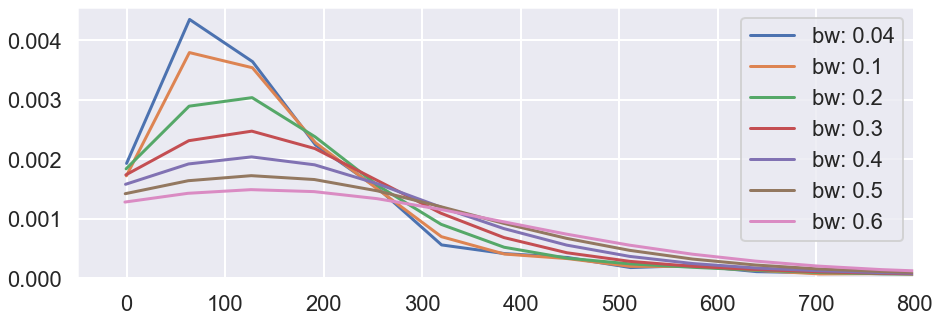

In [165]:
f,ax=plt.subplots(figsize=(15,5))

sns.set_context("poster") 
#This has been added just to see the colours better.

sns.kdeplot(fb_data['Total Interactions'], bw=.04, label="bw: 0.04")
sns.kdeplot(fb_data['Total Interactions'], bw=0.1, label="bw: 0.1")
sns.kdeplot(fb_data['Total Interactions'], bw=0.2, label="bw: 0.2")
sns.kdeplot(fb_data['Total Interactions'], bw=0.3, label="bw: 0.3")
sns.kdeplot(fb_data['Total Interactions'], bw=0.4, label="bw: 0.4")
sns.kdeplot(fb_data['Total Interactions'], bw=0.5, label="bw: 0.5")
sns.kdeplot(fb_data['Total Interactions'], bw=0.6, label="bw: 0.6")

plt.xlim(-50,800)

### Sequential Color Palettes
These palettes are most useful for plots where the data has a wide range, but the relatively low values are uninteresting, and the relatively high values are interesting.

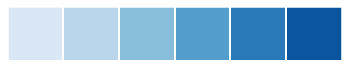

In [166]:
#Using the Blues palette
sns.palplot(sns.color_palette("Blues"))

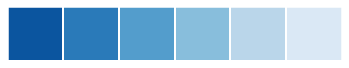

In [167]:
#Reversing the lightness ramp in the palette
sns.palplot(sns.color_palette("Blues_r"))

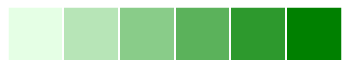

In [170]:
sns.palplot(sns.light_palette("green"))

##### Cubehelix Palettes
This is a sequential palette with a linear increase or decrease in brightness, along with hue variation.
*What is the advantage of this? Print the image, and even in the black and white image, the information will be preserved thanks to the variation in brightness.. It also works in favour of those with color blindness.*

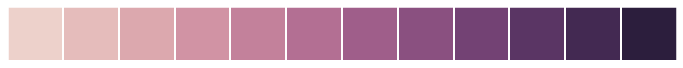

In [171]:
#Calling the default cubehelixpalette in Seaborn,
sns.palplot(sns.cubehelix_palette(12))

In [176]:
sns.set()
sns.set_context() 

(-5000, 15000)

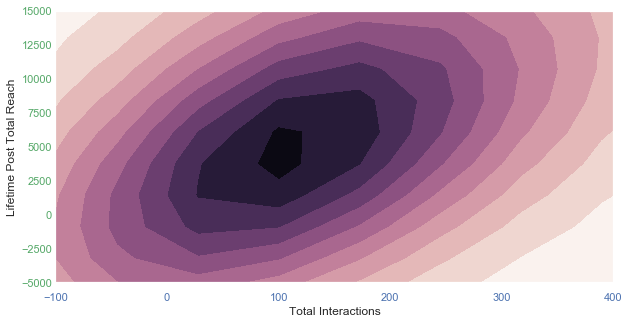

In [187]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(fb_data['Total Interactions'],fb_data['Lifetime Post Total Reach'], 
            cmap=cmap, shade=True);
#We can set the n_levels parameter to specify number of hue levels we need

plt.xlim(-100,400)
plt.ylim(-5000,15000)

### Diverging Color Palettes
Befor we discuss this, let us first see a diverging color palette

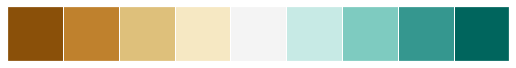

In [178]:
#A Color Brew Palette
sns.palplot(sns.color_palette("BrBG", 9))

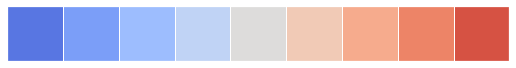

In [179]:
#A matplotlib palette
sns.palplot(sns.color_palette("coolwarm", 9))

# Figure aesthetics: overriding and scaling plot elements

In [180]:
# this command dumps out the details of the currently enabled axes style.
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

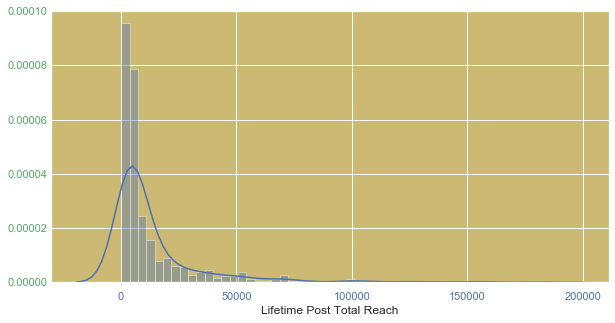

In [182]:
sns.set_style("darkgrid",{'xtick.major.size': 8,
                        'xtick.minor.size': 4.0,
                        'ytick.color': 'g',
                        'xtick.color': 'b',
                        'axes.facecolor': 'y',
                        'ytick.direction': 'in'})

f,ax=plt.subplots(figsize=(10,5))
sns.distplot(fb_data['Lifetime Post Total Reach'])

#### There are four preset contexts available on Seaborn - 
* a paper mode
* a notebook mode
* one for talks
* one for posters

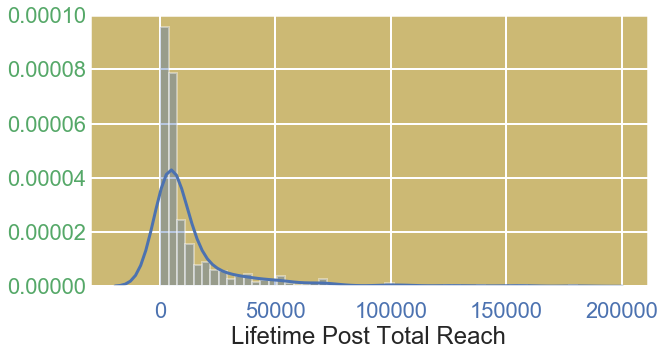

In [183]:
sns.set_context("poster")
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(fb_data['Lifetime Post Total Reach'])

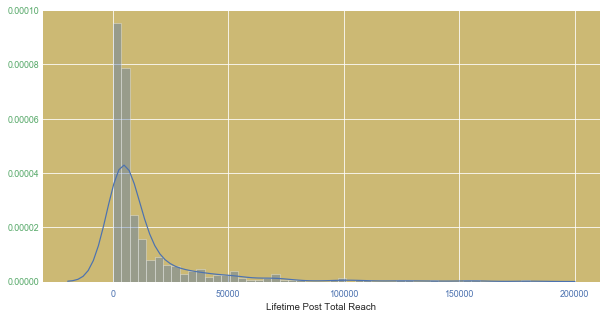

In [184]:
sns.set_context("paper")
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(fb_data['Lifetime Post Total Reach'])

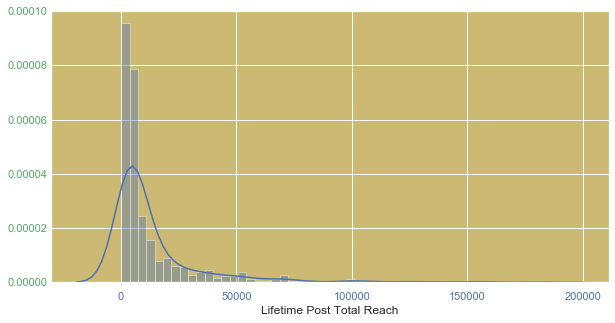

In [186]:
sns.set_context("notebook")
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(fb_data['Lifetime Post Total Reach'])